In [1]:
import pandas as pd
from ml_trade.features import get_indicator_data, exponential_smooth, make_prediction
from ml_trade.train import validation
from ml_trade.test import returns, calculate_max_drawdown, calculate_sharpe_ratio, calculate_wins_losses, calculate_win_loss_ratio, calculate_calmar_ratio

C:\Users\DELL\OneDrive\Desktop\Stock Market Prediction using ML\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_main = pd.read_csv('../data/reversed_NIFTY_50_23_years.csv', usecols=['open', 'high', 'low', 'close'])
df_main = get_indicator_data(df_main)
df_main.dropna(inplace=True)
df_main
period = 1000 # number of days to test on => 1000 means roughly 4 years
df_train = df_main[:-period].reset_index(drop=True)
df_test = df_main[-period:].reset_index(drop=True)

In [3]:
df_main

,close,SMA5,SMA10,SMA15,SMA20,EMA5,EMA10,EMA15,EMA20,BB_MIDDLE,...,fastk,fastd,ULTOSC,WILLR,ATR7,ATR14,Trange,TYPPRICE,VIn,VIp
27,1711.20,1659.96,1618.050,1613.740000,1615.1650,1667.812402,1640.849374,1629.280509,1623.017866,1615.1650,...,90.273484,87.203853,0.532483,-9.726516,41.250000,39.382143,24.10,1705.666667,47.00,39.55
28,1756.00,1691.22,1633.740,1624.066667,1621.8950,1697.208268,1661.785851,1645.120445,1635.682831,1621.8950,...,93.746254,88.006579,0.538178,-6.253746,41.828571,41.321429,60.45,1746.833333,79.55,0.85
29,1744.50,1712.80,1653.570,1632.326667,1627.9850,1712.972179,1676.824787,1657.542889,1646.046371,1627.9850,...,81.408502,88.476080,0.492661,-18.591498,45.828571,42.750000,56.70,1759.566667,82.60,32.90
30,1702.50,1720.76,1668.870,1638.253333,1632.5300,1709.481452,1681.493008,1663.162528,1651.422907,1632.5300,...,66.082832,80.412529,0.474290,-33.917168,49.421429,43.889286,50.05,1713.816667,5.75,101.00
31,1711.10,1725.06,1681.180,1646.566667,1637.7500,1710.020968,1686.876097,1669.154712,1657.106440,1637.7500,...,69.220945,72.237426,0.427545,-30.779055,48.578571,43.400000,40.30,1719.350000,48.35,40.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,22493.55,22421.58,22270.100,22233.693333,22132.8100,22407.111876,22311.166990,22233.443597,22165.859841,22132.8100,...,95.172932,92.318739,0.706934,-4.827068,178.578571,195.953571,95.65,22483.066667,301.30,67.20
6017,22332.65,22412.43,22291.160,22247.720000,22168.6400,22382.291251,22315.072992,22245.844398,22181.744618,22168.6400,...,70.876192,87.470777,0.635625,-29.123808,181.357143,199.496429,219.35,22388.833333,96.60,218.40
6018,22335.70,22398.45,22304.895,22256.970000,22198.2625,22366.760834,22318.823357,22257.076348,22196.407036,22198.2625,...,71.334184,79.127769,0.559958,-28.665816,156.507143,195.575000,196.55,22348.083333,145.30,270.60
6019,21997.70,22326.73,22309.550,22253.146667,22206.1450,22243.740556,22260.437292,22224.654304,22177.482556,22206.1450,...,20.579623,54.263333,0.450577,-79.420377,222.264286,207.278571,541.10,22116.700000,190.75,546.90


['close' 'SMA5' 'SMA10' 'SMA15' 'SMA20' 'EMA5' 'EMA10' 'EMA15' 'EMA20'
 'BB_MIDDLE' 'BB_UPPER' 'BB_LOWER' 'KAMA10' 'KAMA20' 'SAR' 'TRIMA5'
 'TRIMA10' 'ADX5' 'ADX10' 'ADX20' 'CCI5' 'CCI10' 'CCI15' 'MACD510'
 'MACD520' 'MACD1020' 'MACD1520' 'MACD1226' 'MOM10' 'MOM15' 'MOM20' 'ROC5'
 'ROC10' 'ROC20' 'PPO' 'RSI14' 'RSI8' 'fastk' 'fastd' 'ULTOSC' 'WILLR'
 'ATR7' 'ATR14' 'Trange' 'TYPPRICE' 'VIn' 'VIp' 'pred']


<Axes: >

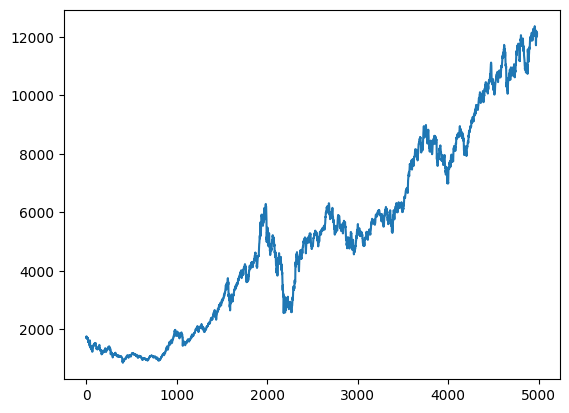

In [4]:
data = exponential_smooth(df_train, 0.8)
data = make_prediction(data, lookahead=10)
data.dropna(inplace=True)
print(data.columns.values)
data['close'].plot()

current_window: (0, 32)
RFC0.125, XTC0.125
current_window: (32, 72)
RFC1.0, XTC1.0
current_window: (64, 112)
RFC0.125, XTC0.125
current_window: (96, 152)
RFC1.0, XTC1.0
current_window: (128, 192)
RFC0.25, XTC0.5
current_window: (160, 232)
RFC0.875, XTC0.875
current_window: (192, 272)
RFC1.0, XTC1.0
current_window: (224, 312)
RFC0.875, XTC0.875
current_window: (256, 352)
RFC0.0, XTC0.0
current_window: (288, 392)
RFC0.875, XTC0.875
current_window: (320, 432)
RFC0.375, XTC0.375
current_window: (352, 472)
RFC0.625, XTC0.75
current_window: (384, 512)
RFC1.0, XTC1.0
current_window: (416, 552)
RFC0.625, XTC0.625
current_window: (448, 592)
RFC0.875, XTC0.875
current_window: (480, 632)
RFC0.875, XTC0.875
current_window: (512, 672)
RFC0.5, XTC0.5
current_window: (544, 712)
RFC0.625, XTC0.75
current_window: (576, 752)
RFC0.0, XTC0.0
current_window: (608, 792)
RFC0.0, XTC0.0
current_window: (640, 832)
RFC0.5, XTC0.375
current_window: (672, 872)
RFC1.0, XTC1.0
current_window: (704, 912)
RFC0.875, X

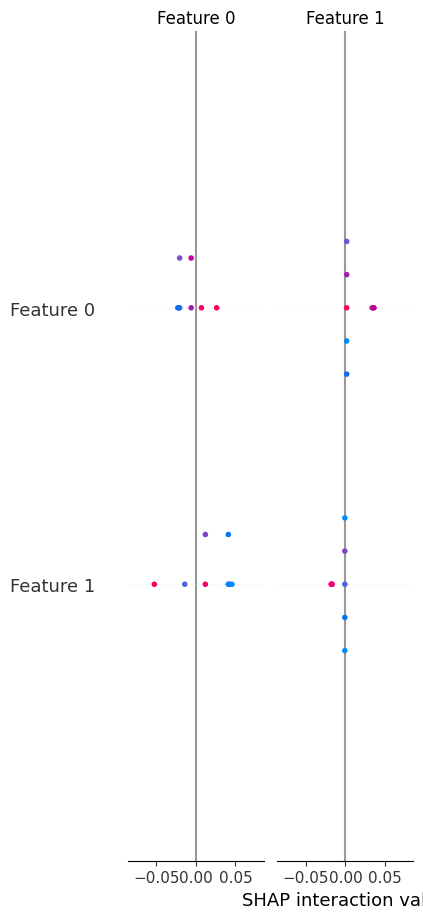

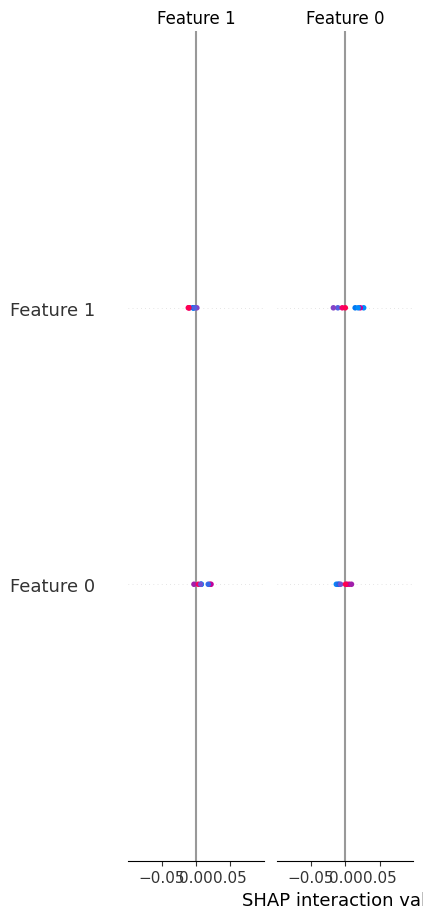

In [5]:
modelRF, modelXT = validation(data)

In [6]:
import pickle

filename1 = "../pretrained_models/rf_model.pickle"
filename2 = "../pretrained_models/xt_model.pickle"

# Save models
pickle.dump(modelRF, open(filename1, "wb"))
pickle.dump(modelXT, open(filename2, "wb"))

# Load models
modelRF = pickle.load(open(filename1, "rb"))
modelXT = pickle.load(open(filename2, "rb"))

C:\Users\DELL\OneDrive\Desktop\Stock Market Prediction using ML\src\ml_trade\test.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100048.64999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i * window + j, data.columns.get_loc("pnl")] = (


cumulative return is 364.56%
annual return is 47.26%


<Axes: >

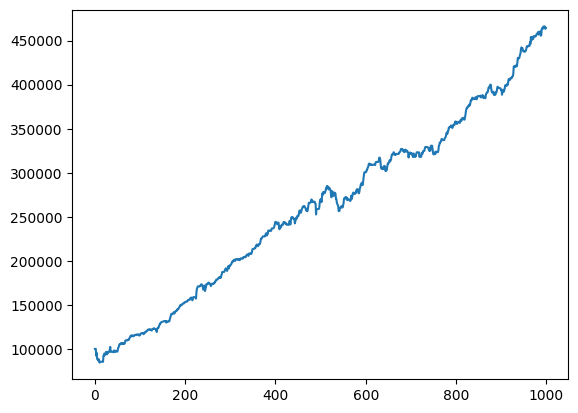

In [7]:
cumulative_return = returns(modelXT, df_test, 100000, window=5, volume=40, confidence=0.5, exponent=2.4, alpha=0.5)
annualized_return = (cumulative_return)**(252/period)
print(f"cumulative return is {(cumulative_return-1)*100:.2f}%")
print(f"annual return is {(annualized_return-1)*100:.2f}%")
df_test['pnl'].plot()

In [8]:
max_drawdown = calculate_max_drawdown(df_test['pnl'])
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

Maximum Drawdown: -15.41%


In [9]:
sharpe_ratio = calculate_sharpe_ratio(df_test['pnl'], 0.15) # 15% risk free rate
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 1.81


In [10]:
calmar_ratio = calculate_calmar_ratio(df_test['pnl']) 
print(f"Calmar Ratio: {calmar_ratio:.2f}")

Calmar Ratio: -2.58


In [11]:
win_loss_ratio = calculate_win_loss_ratio(df_test['pnl']) 
print(f"Win-Loss Ratio: {win_loss_ratio:.2f}")

Win-Loss Ratio: 1.67


C:\Users\DELL\OneDrive\Desktop\Stock Market Prediction using ML\src\ml_trade\test.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '93922.24999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i * window + j, data.columns.get_loc("pnl")] = (


cumulative return is 406.02%
annual return is 50.47%


<Axes: >

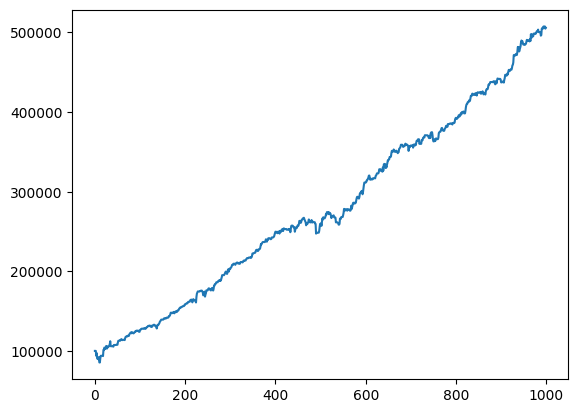

In [12]:
cumulative_return = returns(modelRF, df_test, 100000, window=5, volume=40, confidence=0.5, exponent=2.4, alpha=0.5)
annualized_return = (cumulative_return)**(252/period)
print(f"cumulative return is {(cumulative_return-1)*100:.2f}%")
print(f"annual return is {(annualized_return-1)*100:.2f}%")
df_test['pnl'].plot()

In [13]:
max_drawdown = calculate_max_drawdown(df_test['pnl'])
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

Maximum Drawdown: -14.56%


In [14]:
sharpe_ratio = calculate_sharpe_ratio(df_test['pnl'], 0.15) # 15% risk free rate
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 1.95


In [15]:
calmar_ratio = calculate_calmar_ratio(df_test['pnl']) 
print(f"Calmar Ratio: {calmar_ratio:.2f}")

Calmar Ratio: -2.88


In [16]:
win_loss_ratio = calculate_win_loss_ratio(df_test['pnl']) 
print(f"Win-Loss Ratio: {win_loss_ratio:.2f}")

Win-Loss Ratio: 1.71
